<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Regressao_linear/blob/main/Regressao_Linear_Simples_Aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]}

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


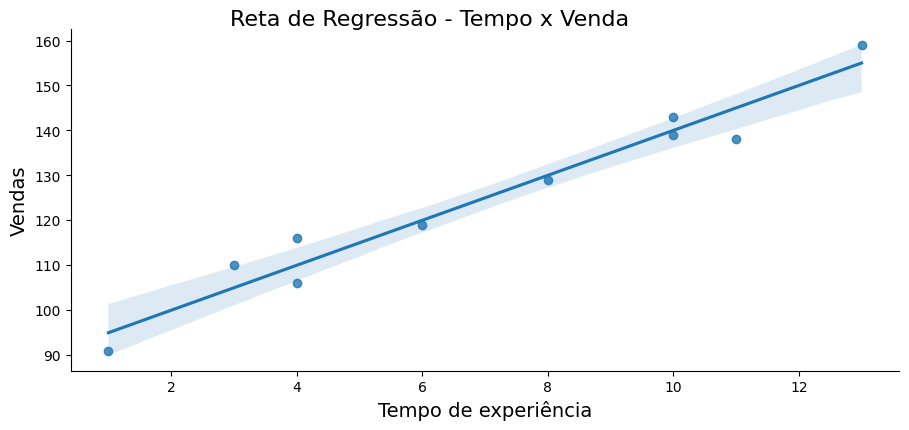

In [5]:
ax = sns.lmplot(x="tempo", y="vendas", data=dataset)
ax.fig.set_size_inches(10, 4)
ax.fig.suptitle('Reta de Regressão - Tempo x Venda', fontsize=16, y=1.02)
ax.set_xlabels("Tempo de experiência", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)
ax;

In [6]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [7]:
import statsmodels.api as sm

In [8]:
Y = dataset.vendas
X = sm.add_constant(dataset.tempo)

In [9]:
Y.head()

,vendas
0,91
1,110
2,106
3,116
4,119


In [10]:
resultado_regressao = sm.OLS(Y, X).fit()

In [11]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.22e-06
Time:                        13:04:55   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


#Resíduo

In [13]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0
5,8,129,130.0
6,10,139,140.0
7,10,143,140.0
8,11,138,145.0
9,13,159,155.0


In [14]:
dataset["residuo"] = dataset["Y_previsto"] - dataset["vendas"]
dataset

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
5,8,129,130.0,1.0
6,10,139,140.0,1.0
7,10,143,140.0,-3.0
8,11,138,145.0,7.0
9,13,159,155.0,-4.0


#Coeficiente de determinação

In [15]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           1.22e-06
Time:                        13:18:46   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
